# Plot Histograms, Heatmap and Scatter Plot

## X vs Y Scatter Plot from CSV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_xy(directory, csv_name, x_branch, y_branch, title, x_label, y_label):

    csv_file = os.path.join(directory, csv_name)
    df = pd.read_csv(csv_file)

    x = df[x_branch]
    y = df[y_branch]

    SIZE_DEFAULT = 14
    SIZE_LARGE = 20

    plt.rc("font", family = 'Century Expanded')  
    plt.rc("font", weight = "normal")  
    plt.rc("font",  size      = SIZE_DEFAULT)  
    plt.rc("axes",  titlesize = SIZE_LARGE + 2)  
    plt.rc("axes",  labelsize = SIZE_LARGE)  
    plt.rc("xtick", labelsize = SIZE_DEFAULT)  
    plt.rc("ytick", labelsize = SIZE_DEFAULT)  

    plt.figure(figsize = (10, 6))
    plt.tight_layout(rect = [0, 0.01, 1, 1])

    plt.plot(x, y, marker = 'o')
    plt.grid(True, alpha = 0.5)
    
    plt.xlabel(x_label, fontweight = "bold", labelpad = 21)
    plt.ylabel(y_label, fontweight = "bold", labelpad = 22)
    plt.title (title  , fontweight = "bold", pad = 25)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_alpha(0.3)
    ax.spines['right'].set_alpha(0.3)
    ax.spines['bottom'].set_alpha(0.7)
    ax.spines['left'].set_alpha(0.7)

    plt.savefig(title + '.png', dpi = 10)
    plt.show()

    print('Plot saved as', title + '.png')

In [ ]:
directory = 'build/root/'
csv_name = 'Aluminio2.csv'

x_branch = "Energy"
y_branch = 'Optimal_Thickness'

title = "title2"
x_label = r"x axis ($keV$)"
y_label = r"y axis"

plot_xy(directory, csv_name, x_branch, y_branch, title, x_label, y_label)

## Plot Histogram from CSV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def histogram(directory, csv_name, data, set_bins, positive, title, x_label, y_label):

    csv_file = os.path.join(directory, csv_name)
    df = pd.read_csv(csv_file)

    points = df[data]
    if positive == True:
        points = df[df[data] > 0]

    plt.figure(figsize=(10, 7))
    #plt.tight_layout(rect=[0, 1, 1, 1])

    SIZE_DEFAULT = 14
    SIZE_LARGE = 20

    plt.rc("font", family = 'Merriweather')  
    plt.rc("font", weight = "normal")  
    plt.rc("font",  size      = SIZE_DEFAULT)  
    plt.rc("axes",  titlesize = SIZE_LARGE + 2)  
    plt.rc("axes",  labelsize = SIZE_LARGE)  
    plt.rc("xtick", labelsize = SIZE_DEFAULT)  
    plt.rc("ytick", labelsize = SIZE_DEFAULT)  

    plt.hist(points, bins = set_bins, alpha = 1)

    plt.axvline(x=45, color='red', linestyle='--', linewidth=2, label='x=45')
    plt.axvline(x=-45, color='blue', linestyle='--', linewidth=2, label='x=-45')


    plt.title(title, pad = 15)
    plt.xlabel(x_label, labelpad = 15)
    plt.ylabel(y_label, labelpad = 15)
    plt.grid(True)

    plt.savefig(title + '.png', dpi = 300)
    plt.show()

    print('Plot saved as', title + '.png')

In [ ]:
directory = 'build/root/'
csv_name = 'rad_3_80_5.csv'

data = "PositionX"
set_bins = 1000
positive = False

title = 'title'
x_label = 'x axis (keV)'
y_label = 'Frequency'

histogram(directory, csv_name, data, set_bins, positive, title, x_label, y_label)

## Plot Heatmap from CSV

In [ ]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

def heatmap(directory, csv_name, x_branch, y_branch, title, x_label, y_label, width, height, size, save_as):

    csv_file = os.path.join(directory, csv_name)
    print(csv_file)
    df = pd.read_csv(csv_file)

    x_data = df[x_branch]
    y_data = df[y_branch]

    fig = go.Figure(go.Histogram2d(
                    x = x_data, 
                    y = y_data,
                    autobinx = False,
                    xbins = dict(start = -size, end = size, size = 0.5),
                    autobiny = False,
                    ybins = dict(start = -size, end = size, size = 0.5),
                    # colorscale = [[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]
                    colorscale=[[0, 'white'], [1, 'black']],  # Grayscale from black to white
                    colorbar = dict(title = "Density", tickfont = dict(family = 'Merriweather', size = 16, color = 'Black'))
                    ))
    
    font_family = 'Merriweather'
    font_small  = 16
    font_medium = 20
    font_large  = 18
    
    fig.update_layout(
                    title = dict(text = title, font = dict(family = font_family, size = font_large, color = "Black"), x = 0.51, y = 0.93, yanchor = 'middle', xanchor = 'center'),
                    xaxis_title = dict(text = x_label, font = dict(family = font_family, size = font_medium, color = "Black")),
                    yaxis_title = dict(text = y_label, font = dict(family = font_family, size = font_medium, color = "Black")),
                    xaxis = dict(tickfont = dict(family = font_family, size = font_small, color = "Black"), title_standoff = 25),
                    yaxis = dict(tickfont = dict(family = font_family, size = font_small, color = "Black"), title_standoff = 10),
                    width  = width,
                    height = height,
                    margin = dict(l = 105, r = 90, t = 90, b = 90),
                    )
    
    pio.write_image(fig, save_as, width = width, height = height, scale = 5)
    # fig.show()

In [ ]:
directory = 'build/root/'
csv_name = 'osteo1.csv'

x_branch = "PositionX"
y_branch = 'PositionY'

title = r"$ \large{ \text{Osteoporosis.}} \ \normalsize{ \text{D to Target} =50cm, \ \text{D to Detector} =15cm, \ \theta = 0°} $"
x_label = r"$ \large{ \text{X Axis} \ (mm)} $"
y_label = r"$ \large{ \text{Y Axis} \ (mm)} $"

width  = 800
height = 800

size = 80

save_as = 'prueba.jpg'

heatmap(directory, csv_name, x_branch, y_branch, title, x_label, y_label, width, height, size, save_as)

In [ ]:
directory = 'build/root/'

dist = [10,  20,  30,   40,  50,  60, 70,  80,   90,  100]

x_branch = "PositionX"
y_branch = 'PositionY'
width  = 800
height = 800
size = 150

for i in range(10):
    csv_name = 'Sim'+str(i)+'.csv'
    save_as = 'Sim'+str(i)+'.jpg'

    title = "Arm Radiography. " + f"D to target = {dist[i]} cm, " + "D to Detector = 15 cm, " + "Angle = 30°"
    x_label = r"$ \large{ \text{X Axis} \ (mm)} $"
    y_label = r"$ \large{ \text{Y Axis} \ (mm)} $"
    heatmap(directory, csv_name, x_branch, y_branch, title, x_label, y_label, width, height, size, save_as)

## Plot 2x2 multi Heatmaps from CSV

In [ ]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

def heatmap(n, directory, csv_1, csv_2, csv_3, csv_4, x_branch, y_branch, title, x_label, y_label, width, height):

    df_1 = pd.read_csv(os.path.join(directory, csv_1))
    df_2 = pd.read_csv(os.path.join(directory, csv_2))

    x_data = [df_1[x_branch], df_2[x_branch]]
    y_data = [df_1[y_branch], df_2[y_branch]]

    if n > 2:
        df_3 = pd.read_csv(os.path.join(directory, csv_3))
        x_data.append(df_3[x_branch])
        y_data.append(df_3[y_branch])
        
        if n > 3:
            df_4 = pd.read_csv(os.path.join(directory, csv_4))
            x_data.append(df_4[x_branch])
            y_data.append(df_4[y_branch])

    fig = make_subplots(rows = 2, cols = 2, horizontal_spacing = 0.13, vertical_spacing = 0.13,
                        subplot_titles = ['Title for Subplot 1', 'Title for Subplot 2', 'Title for Subplot 3', 'Title for Subplot 4'])

    for i in range(2):
        for j in range(2):
            k = i * 2 + j 
            if k < n:  # Check to avoid out-of-bound errors
                fig.add_trace(go.Histogram2d(x = x_data[k], y = y_data[k], xbins = dict(size = 5), ybins = dict(size = 5)), row = i+1, col = j+1,)

    font_family = 'Merriweather'
    font_small  = 12
    font_medium = 16
    font_large  = 20
    
    fig.update_layout(title = dict(text = title, font = dict(family = font_family, size = font_large, color = "Black"), x = 0.5, yanchor = 'middle', xanchor = 'center'),
                      width = width, height = height, margin = dict(l = 105, r = 105, t = 100, b = 100), yaxis_title_standoff = 15)
    
    for i in range(2):
        for j in range(2):
            fig.update_xaxes(tickfont = dict(family = font_family, size = font_small, color = "Black"), row = i+1, col = j+1, title_standoff = 30) # range = [-200, 200]
            fig.update_yaxes(tickfont = dict(family = font_family, size = font_small, color = "Black"), row = i+1, col = j+1, title_standoff = 15)
    
    fig.update_xaxes(title_text = "xaxis 1 title", title_font = dict(family = font_family, size = font_medium, color = "Black"), row = 2, col = 2)
    fig.update_xaxes(title_text = "xaxis 1 title", title_font = dict(family = font_family, size = font_medium, color = "Black"), range=[-200, 200], row = 2, col = 1)
    fig.update_yaxes(title_text = "yaxis 1 title", title_font = dict(family = font_family, size = font_medium, color = "Black"), row = 1, col = 1)
    fig.update_yaxes(title_text = "yaxis 2 title", title_font = dict(family = font_family, size = font_medium, color = "Black"), range=[-200, 200], row = 2, col = 1)
    
    pio.write_image(fig, "test.jpg", width = width, height = height, scale = 5)
    fig.show()

In [ ]:
n = 4

directory = 'BUILD/ROOT/'

csv_1 = 'root0.csv'
csv_2 = 'root1.csv'
csv_3 = 'root2.csv'
csv_4 = 'root4.csv'

x_branch = "X_axis"
y_branch = 'Y_axis'

title = "Heatmap"
x_label = r"$ \large{ \text{X Axis ejemplo} \ (m^2)} $"
y_label = r"$ \large{ \text{Y Axis ejemplo} \ (cm^2)} $"

width  = 800
height = 800

heatmap(n, directory, csv_1, csv_2, csv_3, csv_4, x_branch, y_branch, title, x_label, y_label, width, height)

## Plot Two Vectors

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_xy(x, y1, y2, y3, title, x_label, y_label):

    SIZE_DEFAULT = 12
    SIZE_LARGE = 16

    plt.rc("font", family = 'Century Expanded')  
    plt.rc("font", weight = "normal")  
    plt.rc("font", size = SIZE_DEFAULT)  
    plt.rc("axes", titlesize = SIZE_LARGE + 2)  
    plt.rc("axes", labelsize = SIZE_LARGE)  
    plt.rc("xtick", labelsize = SIZE_DEFAULT)  
    plt.rc("ytick", labelsize = SIZE_DEFAULT)  

    plt.figure(figsize = (10, 6))
    plt.tight_layout(rect = [0, 0.01, 1, 1])

    x1 = np.arange(5, 120, 0.5)
    y4 = 1.5 * (15 + x1) / x1 * 2

    # plt.plot(x, y1, marker = 'x', label = 'Expected size', color = 'red', markersize = 8)
    plt.plot(x, y2, marker = 'o', label = 'Approximate Size without border', color = 'blue', alpha = 0.5, markersize = 8)
    plt.plot(x, y3, marker = 'o', label = 'Full size', color = 'green', markersize = 8)
    plt.plot(x1, y4, marker = 'x', label = 'Expected size', color = 'red', markersize = 5)

    plt.grid(True, alpha = 0.5)
    
    plt.xlabel(x_label, fontweight = "bold", labelpad = 21)
    plt.ylabel(y_label, fontweight = "bold", labelpad = 21)
    plt.title(title, fontweight = "bold", pad = 25)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_alpha(0.3)
    ax.spines['right'].set_alpha(0.3)
    ax.spines['bottom'].set_alpha(0.7)
    ax.spines['left'].set_alpha(0.7)

    plt.legend()

    plt.savefig(save_as, dpi = 300)
    plt.show()

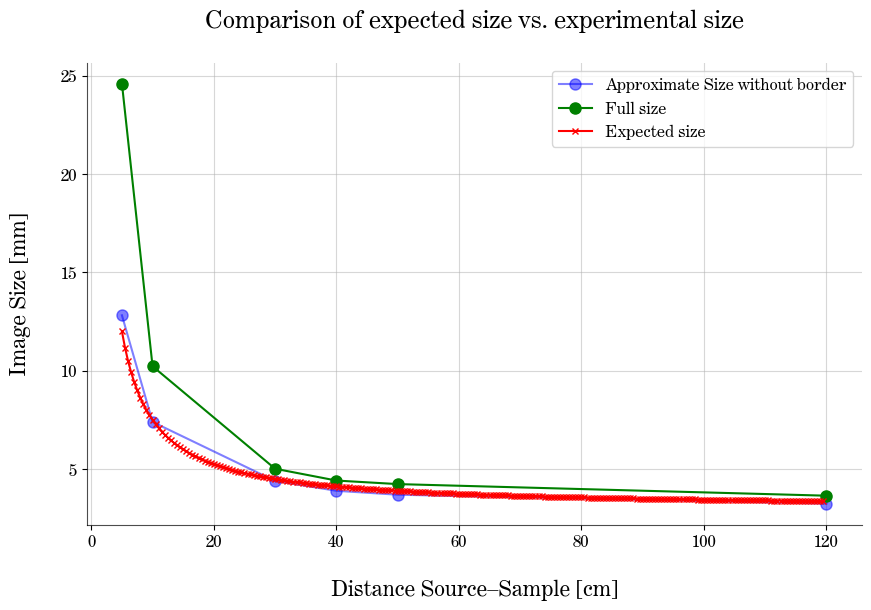

In [5]:
x  = [5, 10, 30, 40, 50, 120]
y1 = [12, 7.5, 4.5, 4.125, 3.9, 3.375]
y2 = [12.82, 7.4, 4.4, 3.9, 3.7, 3.25]
y3 = [24.6, 10.23, 5.02, 4.42,4.24, 3.65 ]

title = "Comparison of expected size vs. experimental size"
x_label = "Distance Source–Sample [cm]"
y_label = "Image Size [mm]"

save_as = "sizes.png"

plot_xy(x, y1, y2, y3, title, x_label, y_label)